# Task4

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import random
import scipy.sparse as sp

adata = sc.read_h5ad("/content/drive/MyDrive/Zhuoyao/Course/ComputationalStemCell/final/data/cna_profile_results/adata3_results.h5ad")



/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
import numpy as np
print(np.min(adata.X), np.max(adata.X))

0.0 8.1912132519714


In [ ]:
print(adata)

AnnData object with n_obs × n_vars = 236863 × 18991
    obs: 'timepoint', 'assay', 'batch', 'cell_type', 'cna_profile'


In [ ]:
adata.obs.timepoint

,timepoint
AACACACAGAACGTCCAAGCATTAGCA,D10
AACACACAGAACGTCCAAGTGTCTGAA,D10
AACACACAGAATCCGGTGAATTCTGGC,D10
AACACACAGACAACAGGTGTAACGCTT,D10
AACACACAGACACCAACGGATTGCGAG,D10
...,...
TGTGGACACTTACACGACGCATTAGCA,D8
TGTGGACACTTCGAGGATCAGGAACCA,D8
TGTGGACACTTCGAGGATCCATATCTC,D8
TGTGGACACTTGAGACAGCTAGGTTGC,D8


In [ ]:
adata.obs.assay

,assay
AACACACAGAACGTCCAAGCATTAGCA,scRNA-seq
AACACACAGAACGTCCAAGTGTCTGAA,scRNA-seq
AACACACAGAATCCGGTGAATTCTGGC,scRNA-seq
AACACACAGACAACAGGTGTAACGCTT,scRNA-seq
AACACACAGACACCAACGGATTGCGAG,scRNA-seq
...,...
TGTGGACACTTACACGACGCATTAGCA,Glycosylation-seq
TGTGGACACTTCGAGGATCAGGAACCA,Glycosylation-seq
TGTGGACACTTCGAGGATCCATATCTC,Glycosylation-seq
TGTGGACACTTGAGACAGCTAGGTTGC,Glycosylation-seq


In [ ]:
adata.obs.batch

,batch
AACACACAGAACGTCCAAGCATTAGCA,D10_scRNA-seq
AACACACAGAACGTCCAAGTGTCTGAA,D10_scRNA-seq
AACACACAGAATCCGGTGAATTCTGGC,D10_scRNA-seq
AACACACAGACAACAGGTGTAACGCTT,D10_scRNA-seq
AACACACAGACACCAACGGATTGCGAG,D10_scRNA-seq
...,...
TGTGGACACTTACACGACGCATTAGCA,D8_Glycosylation-seq
TGTGGACACTTCGAGGATCAGGAACCA,D8_Glycosylation-seq
TGTGGACACTTCGAGGATCCATATCTC,D8_Glycosylation-seq
TGTGGACACTTGAGACAGCTAGGTTGC,D8_Glycosylation-seq


In [ ]:
adata.obs.cell_type

,cell_type
AACACACAGAACGTCCAAGCATTAGCA,unknown
AACACACAGAACGTCCAAGTGTCTGAA,unknown
AACACACAGAATCCGGTGAATTCTGGC,unknown
AACACACAGACAACAGGTGTAACGCTT,unknown
AACACACAGACACCAACGGATTGCGAG,unknown
...,...
TGTGGACACTTACACGACGCATTAGCA,unknown
TGTGGACACTTCGAGGATCAGGAACCA,unknown
TGTGGACACTTCGAGGATCCATATCTC,unknown
TGTGGACACTTGAGACAGCTAGGTTGC,unknown


In [ ]:
adata.obs.cna_profile

,cna_profile
AACACACAGAACGTCCAAGCATTAGCA,HSCHR2_6_CTG1:59578-236573(loss)
AACACACAGAACGTCCAAGTGTCTGAA,HSCHR2_6_CTG1:59578-236573(loss);HSCHR22_1_CTG...
AACACACAGAATCCGGTGAATTCTGGC,HSCHR2_6_CTG1:59578-236573(loss);HSCHR22_1_CTG...
AACACACAGACAACAGGTGTAACGCTT,HSCHR2_6_CTG1:59578-236573(loss);HSCHR22_1_CTG...
AACACACAGACACCAACGGATTGCGAG,HSCHR2_6_CTG1:59578-236573(loss);HSCHR22_1_CTG...
...,...
TGTGGACACTTACACGACGCATTAGCA,HSCHR2_6_CTG1:59578-236573(loss);HSCHR22_1_CTG...
TGTGGACACTTCGAGGATCAGGAACCA,HSCHR2_6_CTG1:59578-236573(loss);HSCHR22_1_CTG...
TGTGGACACTTCGAGGATCCATATCTC,HSCHR2_6_CTG1:59578-236573(loss);HSCHR22_1_CTG...
TGTGGACACTTGAGACAGCTAGGTTGC,HSCHR2_6_CTG1:59578-236573(loss);HSCHR22_1_CTG...


In [ ]:
adata.var

""
A1BG
A1BG-AS1
A2M
A2M-AS1
A2ML1
...
ZXDC
ZYG11A
ZYG11B
ZYX


In [ ]:
adata_scrna = adata[adata.obs['assay'] == 'scRNA-seq'].copy()

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
adata_scrna.obs['cna_profile']

,cna_profile
AACACACAGAACGTCCAAGCATTAGCA,HSCHR2_6_CTG1:59578-236573(loss)
AACACACAGAACGTCCAAGTGTCTGAA,HSCHR2_6_CTG1:59578-236573(loss);HSCHR22_1_CTG...
AACACACAGAATCCGGTGAATTCTGGC,HSCHR2_6_CTG1:59578-236573(loss);HSCHR22_1_CTG...
AACACACAGACAACAGGTGTAACGCTT,HSCHR2_6_CTG1:59578-236573(loss);HSCHR22_1_CTG...
AACACACAGACACCAACGGATTGCGAG,HSCHR2_6_CTG1:59578-236573(loss);HSCHR22_1_CTG...
...,...
TGTGGACACTTACACGACGCATTAGCA,HSCHR2_6_CTG1:59578-236573(loss);HSCHR22_1_CTG...
TGTGGACACTTCGAGGATCAGGAACCA,HSCHR2_6_CTG1:59578-236573(loss)
TGTGGACACTTCGAGGATCCATATCTC,HSCHR2_6_CTG1:59578-236573(loss)
TGTGGACACTTGAGACAGCTAGGTTGC,HSCHR22_1_CTG4:59734-259895(loss)


In [ ]:
target_cna = "HSCHR2_6_CTG1:59578-236573(loss)"
adata_scrna.obs['has_cna'] = adata_scrna.obs['cna_profile'].str.contains(target_cna, regex=False, na=False)

adata_scrna.obs['has_cna'].value_counts()


,count
has_cna,
True,76247
False,7603


In [ ]:

adata_scrna.obs['chr6_loss_status'] = adata_scrna.obs['has_cna'].map({True: 'CNA+', False: 'CNA-'})

adata_scrna.obs['chr6_loss_status'].value_counts()

,count
chr6_loss_status,
CNA+,76247
CNA-,7603


In [ ]:

adata_scrna.obs_names_make_unique()

np.random.seed(42)

# random sampling
idx_cna_pos = adata_scrna.obs[adata_scrna.obs['has_cna'] == True].sample(n=2000, random_state=42).index
idx_cna_neg = adata_scrna.obs[adata_scrna.obs['has_cna'] == False].sample(n=2000, random_state=42).index

# combine subsets
selected_idx = idx_cna_pos.union(idx_cna_neg)
adata_sub = adata_scrna[selected_idx].copy()

# add label
adata_sub.obs['chr6_loss_status'] = adata_sub.obs['has_cna'].map({True: 'CNA+', False: 'CNA-'})


In [ ]:
adata_sub

AnnData object with n_obs × n_vars = 4000 × 18991
    obs: 'timepoint', 'assay', 'batch', 'cell_type', 'cna_profile', 'cna_chr6_loss', 'has_cna', 'chr6_loss_status'
    uns: 'pca', 'rank_genes_groups'
    obsm: 'X_pca'
    varm: 'PCs'

In [ ]:
import scanpy as sc

print(adata_sub.obs['chr6_loss_status'].value_counts())
sc.tl.rank_genes_groups(adata_sub, groupby='chr6_loss_status', groups=['CNA+'], reference='CNA-', method='wilcoxon')


chr6_loss_status
CNA+    2000
CNA-    2000
Name: count, dtype: int64


In [ ]:
print(adata_sub.uns['rank_genes_groups'].keys())


dict_keys(['params', 'names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges'])


In [ ]:
import pandas as pd

deg_result = adata_sub.uns['rank_genes_groups']
deg_df = pd.DataFrame({
    'names': deg_result['names']['CNA+'],
    'scores': deg_result['scores']['CNA+'],
    'pvals_adj': deg_result['pvals_adj']['CNA+']
})

deg_df.head(200).to_csv("chr6_loss_top200_DEG.csv", index=False)


In [ ]:
pip install gseapy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 11.9 MB/s eta 0:00:00


In [ ]:
from gseapy import enrichr

top_genes = deg_df['names'].dropna().tolist()[:200]


In [ ]:
from gseapy import enrichr

enr = enrichr(
    gene_list=top_genes,
    gene_sets='GO_Biological_Process_2021',
    organism='Human',
    outdir='enrichr_results_chr6_loss',
    cutoff=0.05  # FDR threshold
)


<Axes: title={'center': 'GO Biological Process Enrichment (chr6_loss)'}, xlabel='Combined Score'>

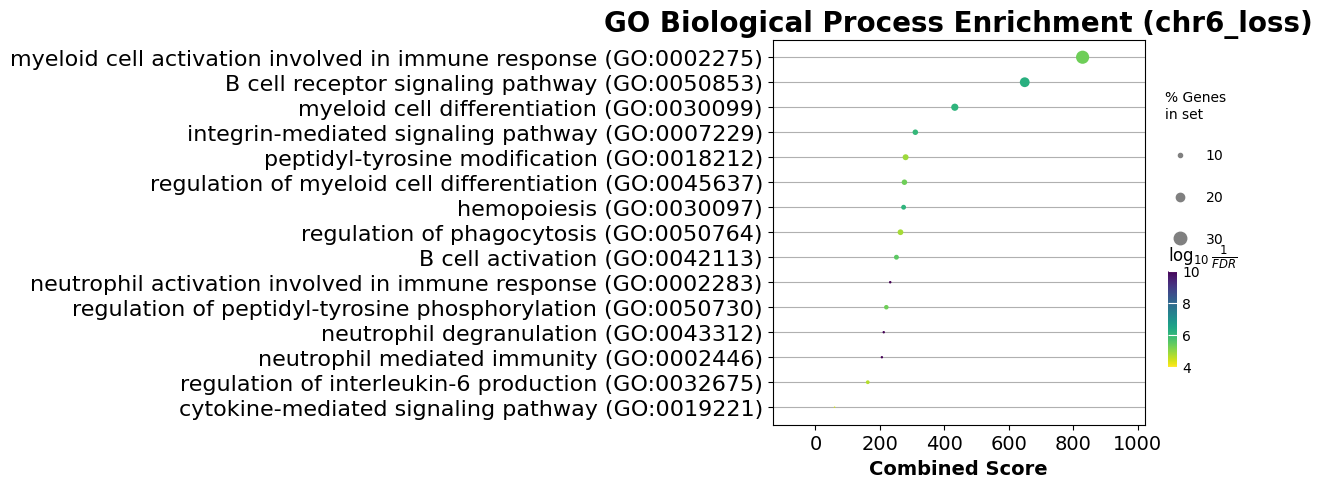

In [ ]:
from gseapy import dotplot

dotplot(
    enr.results,
    title='GO Biological Process Enrichment (chr6_loss)',
    cutoff=0.05,
    top_term=15,
    figsize=(6, 5)
)


In [ ]:
import scanpy as sc

sc.pp.highly_variable_genes(adata_sub, n_top_genes=2000)
sc.pp.scale(adata_sub, max_value=10)
sc.pp.pca(adata_sub, n_comps=50)

sc.pp.neighbors(adata_sub, n_neighbors=15, n_pcs=30)
sc.tl.umap(adata_sub)


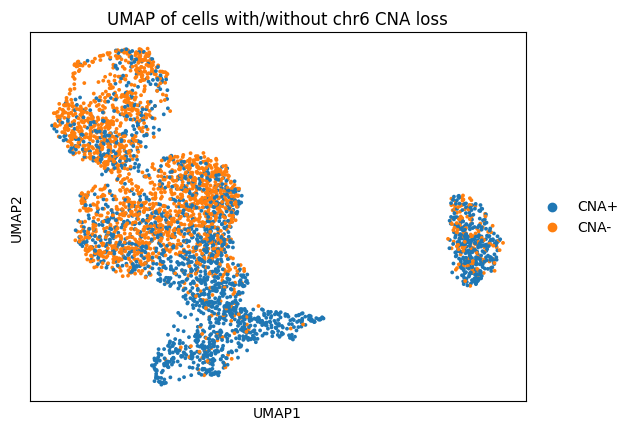

In [ ]:
sc.pl.umap(
    adata_sub,
    color='chr6_loss_status',
    title='UMAP of cells with/without chr6 CNA loss',
    palette=['#1f77b4', '#ff7f0e']
)


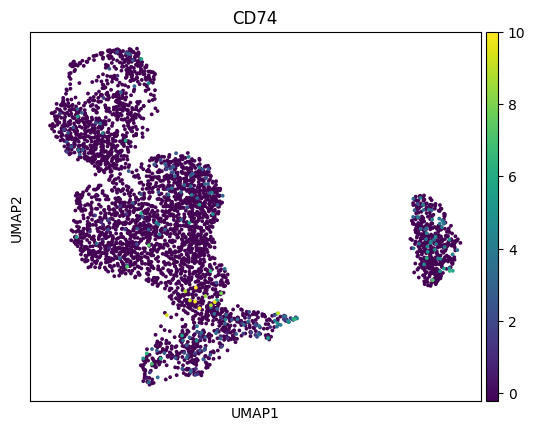

In [ ]:

sc.pl.umap(adata_sub, color='CD74', cmap='viridis')


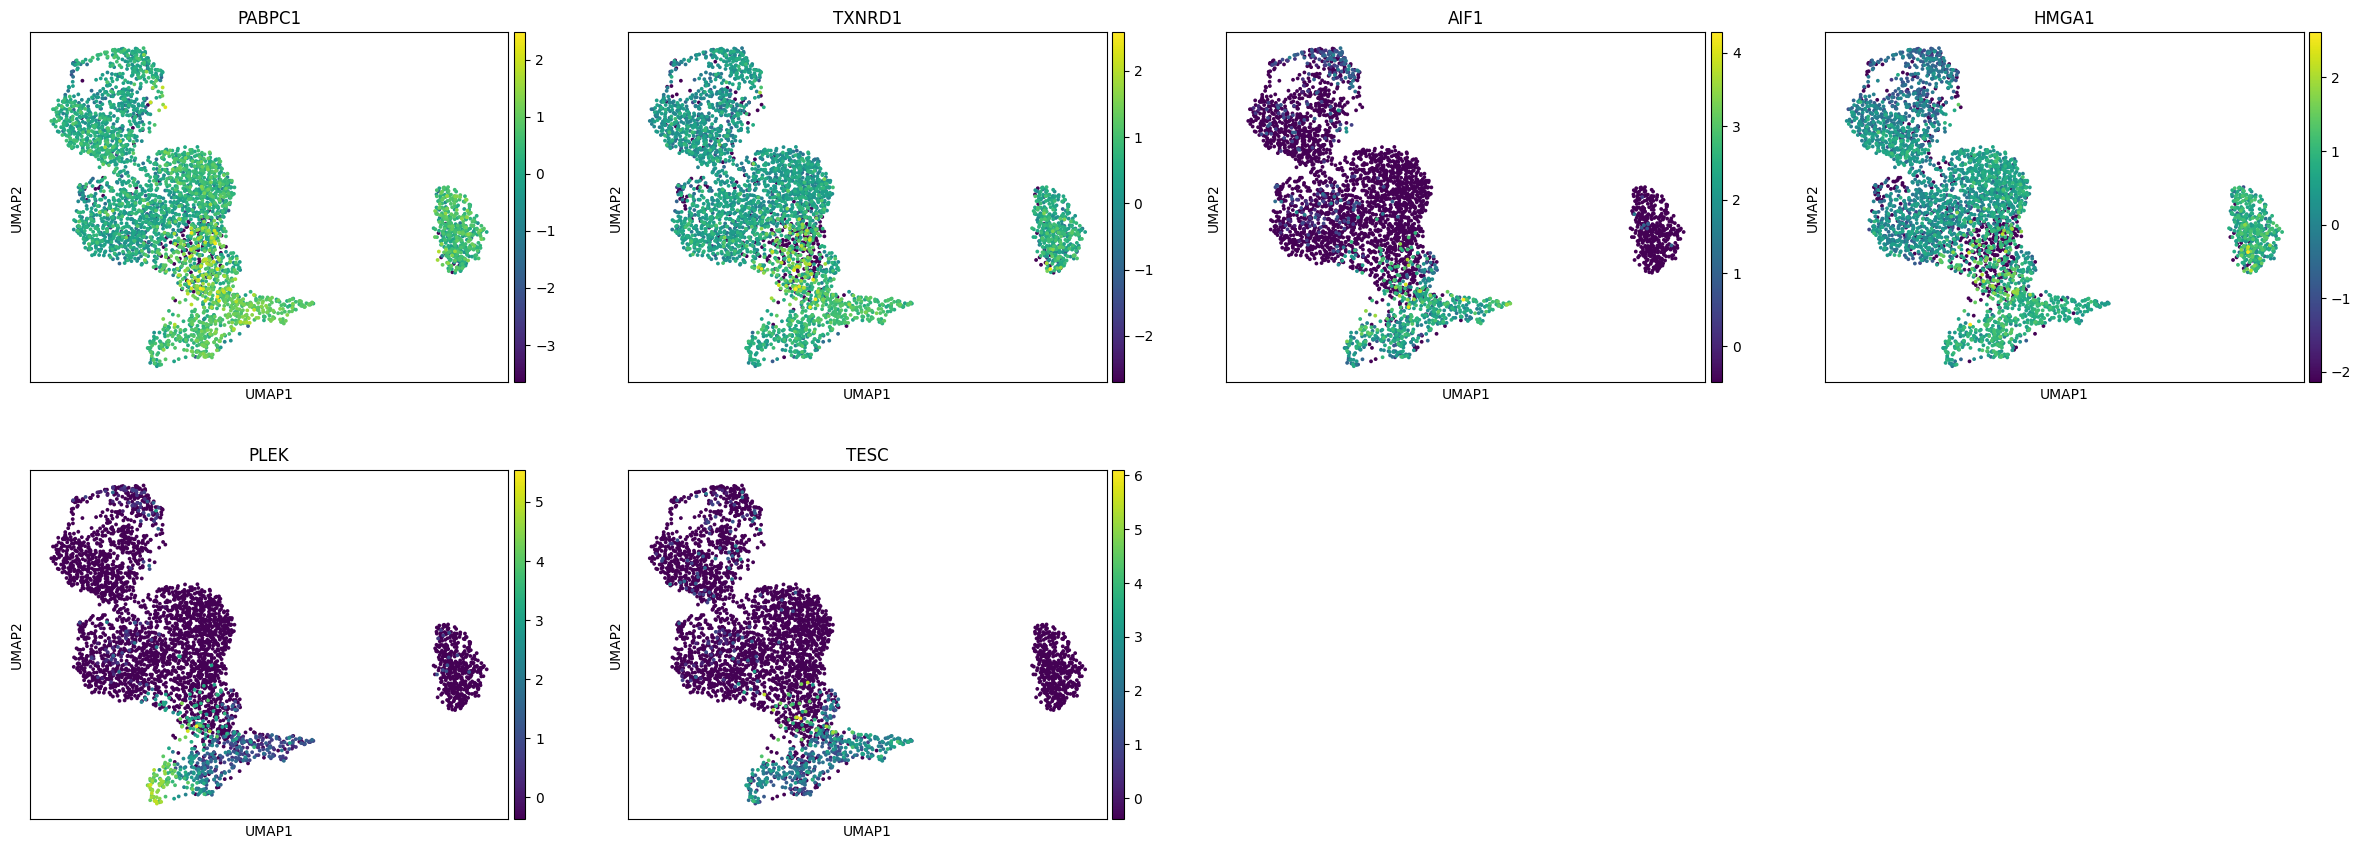

In [ ]:
genes_to_plot = deg_df['names'].dropna().tolist()[:6]
sc.pl.umap(adata_sub, color=genes_to_plot, cmap='viridis')
